# __Table of Contents__

## __Part I - Exploratory Data Analysis__
### 1.1 Packages to be Imported
### __Part II - Experiment and Metrics Designs__
- 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
- 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
  - a. how you will implement the experiment
 - b. what statistical test(s) you will conduct to verify the significance of the observation
 - c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
### __Part III - Predictive Modeling__
 - Load and Inspect data
 - Data Wrangling
 -  Avg_rating_of_driver
 - Avg_rating_by_driver
 - Phone
 - Last_trip_date
#### __EDA__
#### __Model Building__
#### __Business Recommendations__

__About the Ultimate Challenge:__

Ultimate Technologies Inc. is an American worldwide online transportation network company that has disrupted the taxi and logistics industry and is a prestigious company to work at. This challenge has been adapted from an actual Ultimate Inc. data science challenge.

The logins.json file contains (simulated) timestamps of user logins in a particular geographic location.

# __Part I - Exploratory Data Analysis__

## 1.1 Packages to be Imported

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

import calendar

In [2]:
# Load the json dataset to a dataframe
logins = pd.read_json('logins.json')

# Display tha head of dataframe
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
# Check shape of data 
logins.shape

(93142, 1)

In [4]:
# Print the info of data
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
# Check for the simple statistics
logins.describe()

,login_time
count,93142
mean,1970-02-26 19:09:39.779648278
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


Whereas the logins dataset has a total of 93,142 entries, some of the data were duplicated (the unique number of entries is equal to 92,265). So far, with the information available to us, it is difficult to say is if those duplicated entries are valid or not. But for the purpose of this data science challenge, all entries will be accepted as valid entries.

In [6]:
# Set the 'login_time' feature as the index
logins=logins.set_index('login_time')

# Add a new column called 'count' to aggregate the login counts
logins['count']=1

# Aggregate the login counts based on 15-minute time intervals
logins=logins.resample('15min').sum()

In [7]:
logins.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


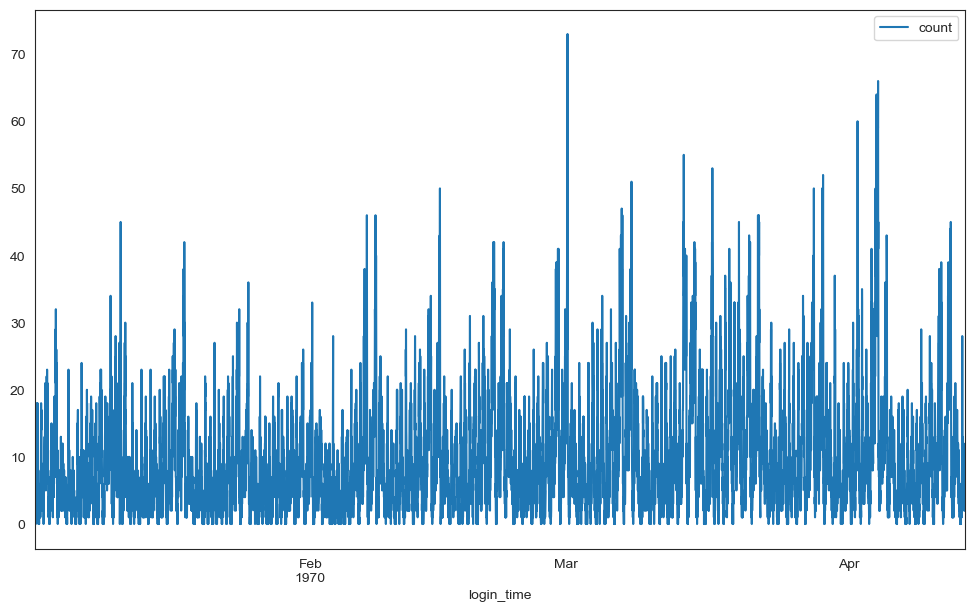

In [8]:
logins.plot(kind='line',figsize=(12,7))
plt.show()

The line plot shows that the login counts seem to be roughly periodic and the average value seem to increase over time. In the following section, we will generate more plots to develop better insight into the periodicity of the data.

In [9]:
# List the name of days and months to be used in the subsquent plotting
days   = list (calendar.day_abbr)
months = list (calendar.month_abbr)

In [10]:
# Add a new column and convert it to a datetime object
logins['timestamp'] = pd.to_datetime(logins.index)

In [11]:
# extract time features from the datetime index

logins['month'] = logins['timestamp'].apply(lambda x : months[x.month])
logins['day'] = logins['timestamp'].apply(lambda x: days[x.weekday()])
logins['hour'] = logins['timestamp'].apply(lambda x: x.hour)

In [12]:
logins.sample(5)

,count,timestamp,month,day,hour
login_time,,,,,
1970-02-05 08:45:00,0,1970-02-05 08:45:00,Feb,Thu,8
1970-02-21 09:00:00,0,1970-02-21 09:00:00,Feb,Sat,9
1970-02-06 21:30:00,25,1970-02-06 21:30:00,Feb,Fri,21
1970-03-10 01:30:00,9,1970-03-10 01:30:00,Mar,Tue,1
1970-03-10 13:00:00,7,1970-03-10 13:00:00,Mar,Tue,13


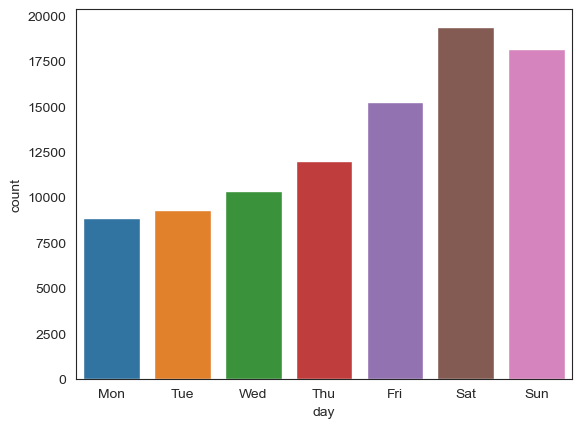

In [13]:
# Group the 'count' feature by the 'day' feature and plot it
day_counts = logins.groupby('day')['count'].sum()

sns.barplot(x=day_counts.index,y=day_counts,order=days)
plt.show()

The graph above shows that most of the logins are happening on Satudays and followed by Sundays, whereas the least activity is happening on Mondays. Overall, the number of logins tend to increase over time during a week from Monday to Saturday.

<Axes: xlabel='month', ylabel='count'>

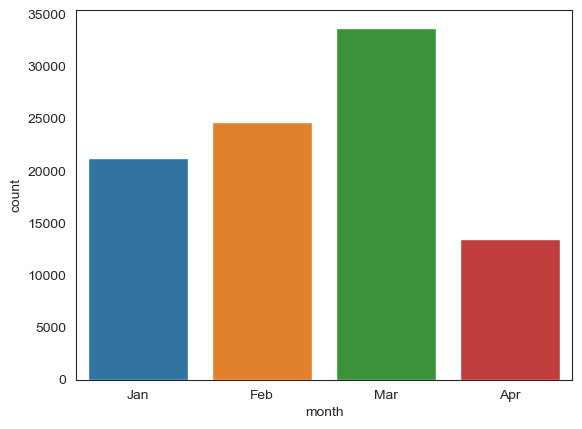

In [14]:
# Group the 'count' feature by the 'month' feature and plot it

month_counts =  logins.groupby('month')['count'].sum()

sns.barplot(x=month_counts.index,y=month_counts,order=['Jan', 'Feb', 'Mar', 'Apr'])

Again, as the monthly login data confirms, the number of logins seem to increase over the months. It should also be noted here that the data for April were limited to 13 days. Considering the increase over time, we can expect another increase in April as well.

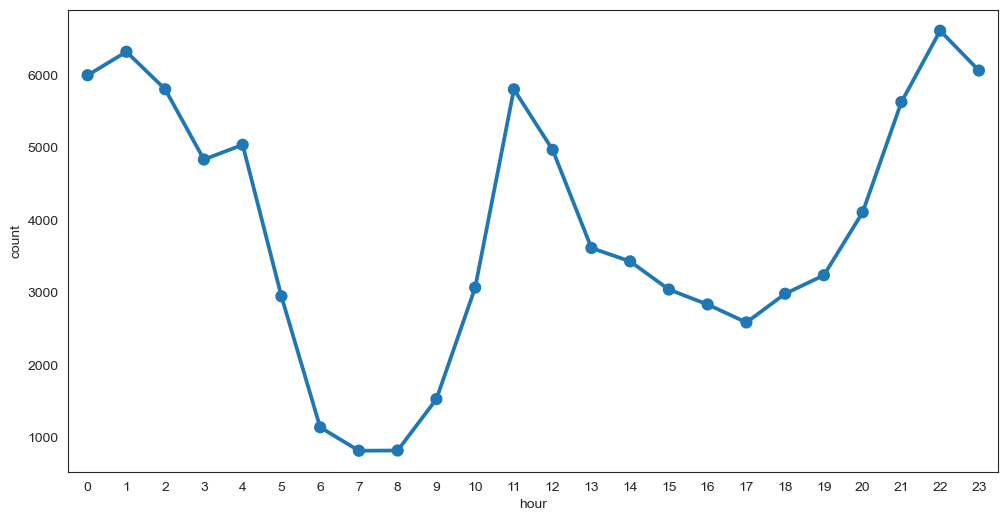

In [15]:
# group the 'count' feature by the 'hour' feature and plot it
hour_counts = logins.groupby('hour')['count'].sum()
plt.figure(figsize=(12,6))
sns.pointplot(x=hour_counts.index, y=hour_counts)
plt.show()


This graph here was produced to display the number of logins in every hour of a day. The daily pattern suggests that the login counts at 15-min intervals sees the lowest in the morning around 6:00 a.m. - 9:00 a.m. and rises up around noon 11:00 a.m. - 12:00 p.m. (possible launch time). It gradually declines until 5:00 p.m. and rises back again in the late evening 10:00 p.m. - 2:00 a.m.

# __Part II - Experiment and Metrics Designs__

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

__1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?__

The key measure of success of this experiment can be a metric that indicates the percentage of time drivers, irrespective of which city they belong to, spend in either city. Since the two neighboring cities have a complementary circadian rhythms, we would expect that the average amount of time a driver spend in either city should be ideally close to equal in a perfectly succesful experiment: 50% of the time in Gotham and 50% of the time in Metropolis. If the driver spend more time in either of the cities, it means that the experiment is less successful or not sucessful at all depending upon the expectations from this experiment. Basically, I propose the ratio of time spend in the cities of Gotham and Metropolis as the success metric where the ratio of 1:1 means that the experiment is successful.

__2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:__

__a. How you will implement the experiment__

I would implement the following steps as part of this experiment to see if the proposed changes on toll costs have affected the behavior of the drivers:

First, I would need to find out the data for driver partners of the cities of Gotham and Metropolis. For each group of drivers, I would randomly split the group in half (the control and experiment group). As the drivers in experiment group pass the toll-bridge, I would provide them the reimburserment of all toll costs. Lastly, I would compare the the control and experiment groups who were paid for toll costs to see if there is a statistically significant difference on the behaviors of drivers between the groups.

__b. What statistical test(s) you will conduct to verify the significance of the observation__

I would conduct an A/B test to verify the significance of the observation after I randomly divide each group of drivers into half. The A/B test would allow us to compare the control and experiment groups where the toll reimbursement works as the variable between the groups. After I collect enough data, I would perform a hypothesis testing and compute a two-sample t statistic to determine the significance of the observation. If the null hypothesis holds, it implies that the experiment has been a failure. Otherwise, it implies the toll reimbursement experiment is a success.

__c. How you would interpret the results and provide recommendations to the city operations team along with any caveats.__

Again, based on the p-value obtained from the above t-test for each group, if we reject the null hypothesis, I would recommend the Ultimate managers of city operation to continue implementing the toll reimbursement to encourage drivers to be available in both cities. if we fail to reject the null hypothesis, I would suggest that they should stop implementing the experiment and develop other solutions.

# Part III - Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

__The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.__

- Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
 - Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system.  - - Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?  -_   - Include any key indicators of model performance.
 - Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

### Load and Inspect data

In [17]:
# import packages
import json

# Read json data into dataframe

with open ('ultimate_data_challenge.json') as ud :
    ultimate = json.load(ud)
    
# Convert to dataframe
ultimate = pd.DataFrame(ultimate)


# Print head of ultimate data

print(ultimate.head())

             city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   

In [18]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


There are missing values in 'avg_rating_of_driver','phone ',and 'avg_rating_by_driver ' columns. they need to be managing.

In [19]:
ultimate.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


Here, the descriptive stistics of the all features are displayed. The maximum values in some columns seem to be much larger than the mean, but based on other informations and plots, no apparent outliers are identified.

### Data Wrangling

I will impute the three columns given above with the missing values. To do so, I need some information for each column such as mean or median to be used for imputation.

#### Avg_rating_of_driver

C:\Users\khara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


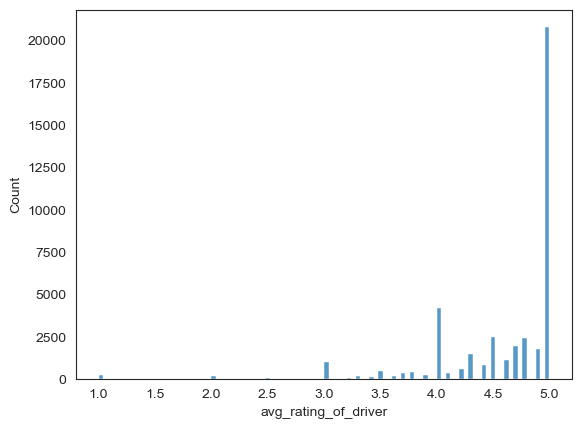

In [22]:
sns.histplot(ultimate[ultimate['avg_rating_of_driver'].notnull()]['avg_rating_of_driver'])
plt.show()

In [23]:
# Fill the missing values with themean of 'avg_rating_of_driver'
ultimate['avg_rating_of_driver'] = ultimate['avg_rating_of_driver'].fillna(ultimate['avg_rating_of_driver'].mean())

#### Avg_rating_by_driver

C:\Users\khara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='avg_rating_by_driver', ylabel='Count'>

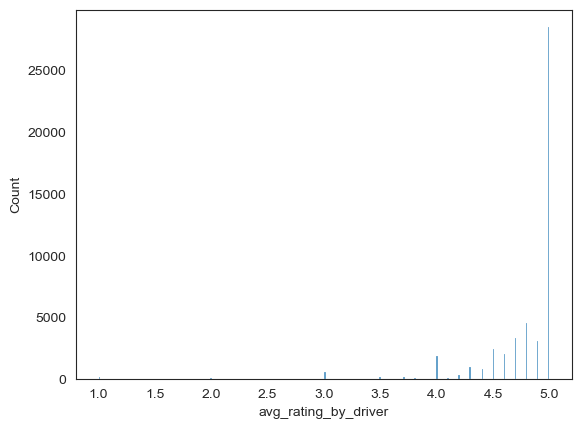

In [24]:
sns.histplot(ultimate[ultimate['avg_rating_by_driver'].notnull()]['avg_rating_by_driver'])

In [25]:
# Fill the missing values with themean of 'avg_rating_of_driver'
ultimate['avg_rating_by_driver'] = ultimate['avg_rating_by_driver'].fillna(ultimate['avg_rating_by_driver'].mean())

I filled missing values with mean instead of drop, because I think it is more useful.

#### Phone

In [26]:
ultimate.phone.value_counts()

phone
iPhone     34582
Android    15022
Name: count, dtype: int64

Iphone seems to be used more than Android. so we can impute missing values with Iphone or we could just leave as it is

In [27]:
# Fill the missing values of the 'phone' column with the value of 'Iphone'

ultimate['phone'] = ultimate['phone'].fillna('Iphone')

#### Last_trip_date

In [28]:
# Convert date-related columns to datatime format
ultimate['last_trip_date'] = pd.to_datetime(ultimate['last_trip_date'],format='%Y-%m-%d')
ultimate['signup_date']    = pd.to_datetime(ultimate['signup_date'],   format='%Y-%m-%d')

To be able to perform rider retention prediction, I need to operationalize 'rider retention'.

In [29]:
# Sort the last trip date to determine the user retention
ultimate['last_trip_date'].sort_values(ascending=False).head(10)

4486    2014-07-01
43047   2014-07-01
24059   2014-07-01
40290   2014-07-01
28689   2014-07-01
41544   2014-07-01
44457   2014-07-01
21699   2014-07-01
15631   2014-07-01
33653   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

Based on the last trip date info, the data was pulled on July 1, 2014. So, a rider is considered retained if s/he took a trip after June 1, 2014.

In [30]:
# Compute the cutoff time for determing user retention
cutoff = ultimate['last_trip_date'].max() - pd.Timedelta('30 days')

cutoff

Timestamp('2014-06-01 00:00:00')

In [31]:
# Determine if a user is retained based on the cutoff time
ultimate['retained'] = ultimate['last_trip_date'].apply(lambda x: 1 if x >= cutoff else 0)

# Compute the fraction of user retained
ultimate['retained'].value_counts()

retained
0    31196
1    18804
Name: count, dtype: int64

As shown, only 18,804 riders (37.6% of all users) signed up in January, 2014 are retained six month later.

In [32]:
ultimate = ultimate.drop('signup_date', axis=1)

In [33]:
ultimate = ultimate.drop('last_trip_date', axis=1)

#### EDA

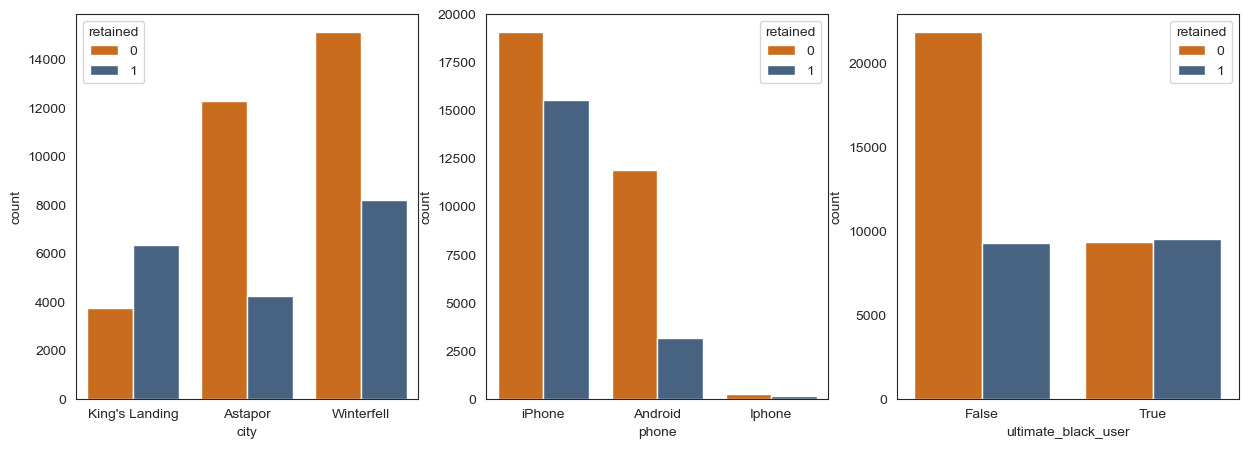

In [34]:
plt.figure(figsize=(15,5))

# city and retained
ax1 = plt.subplot(1,3,1)
sns.countplot(x='city', data=ultimate, hue='retained', palette=['#e76a00', '#3e618b'])

# phone and retained
ax2 = plt.subplot(1,3,2)
sns.countplot(x='phone', data=ultimate, hue='retained', palette=['#e76a00', '#3e618b'])

# ultimate_black_user and retained
ax3 = plt.subplot(1,3,3)
sns.countplot(x='ultimate_black_user', data=ultimate, hue='retained', palette=['#e76a00', '#3e618b'])

plt.show()

When we look at the relationship between the categorical features and the retained feature (dependent/target variable), King's Landing seems to be the most successful among the three cities, whereas Astapor is the least successful. Also, iPhone users have higher retention rate than Android users. Lastly, ultimate black users have a higher retention rate than non-ultimate black users.

In [50]:
ultimate.corr()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_King's Landing,city_Winterfell,phone_Iphone,phone_iPhone
trips_in_first_30_days,1.000000,-0.011060,-0.001841,0.005720,0.112210,0.050388,-0.136329,-0.039097,0.210463,0.024650,0.037735,0.002786,0.058342
avg_rating_of_driver,-0.011060,1.000000,-0.021653,-0.003290,-0.001916,0.012587,0.028508,0.101660,-0.010829,0.082156,-0.094304,0.001530,-0.024323
avg_surge,-0.001841,-0.021653,1.000000,0.793582,-0.078791,-0.110071,-0.081491,0.010498,-0.003333,-0.009198,-0.027643,-0.011423,0.011104
surge_pct,0.005720,-0.003290,0.793582,1.000000,-0.106861,-0.144918,-0.104414,0.019964,0.011797,0.028221,-0.065603,-0.014456,0.012851
ultimate_black_user,0.112210,-0.001916,-0.078791,-0.106861,1.000000,0.035998,0.032310,0.009328,0.205002,0.039649,-0.051990,0.043145,0.067002
weekday_pct,0.050388,0.012587,-0.110071,-0.144918,0.035998,1.000000,0.101652,0.020366,0.009693,0.031349,-0.015318,0.012753,0.006726
avg_dist,-0.136329,0.028508,-0.081491,-0.104414,0.032310,0.101652,1.000000,0.079793,-0.092780,0.015877,0.030050,0.022372,-0.025030
avg_rating_by_driver,-0.039097,0.101660,0.010498,0.019964,0.009328,0.020366,0.079793,1.000000,-0.026748,0.084480,-0.098727,0.007433,-0.010127
retained,0.210463,-0.010829,-0.003333,0.011797,0.205002,0.009693,-0.092780,-0.026748,1.000000,0.262284,-0.046611,-0.007419,0.225244
city_King's Landing,0.024650,0.082156,-0.009198,0.028221,0.039649,0.031349,0.015877,0.084480,0.262284,1.000000,-0.471555,-0.009111,0.060520


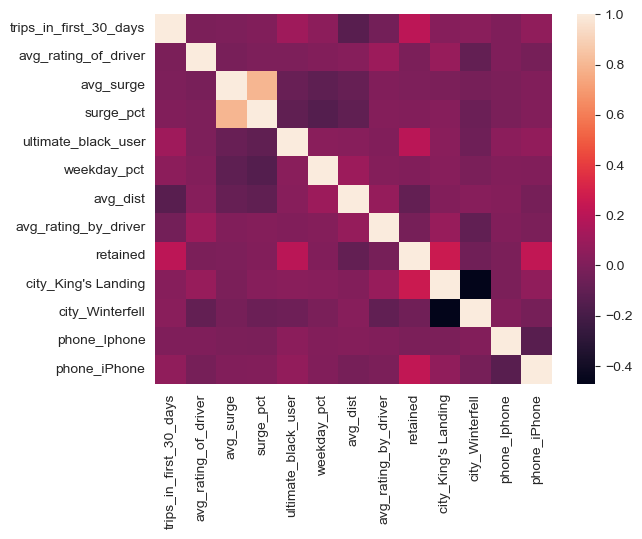

In [51]:
sns.heatmap(ultimate.corr());

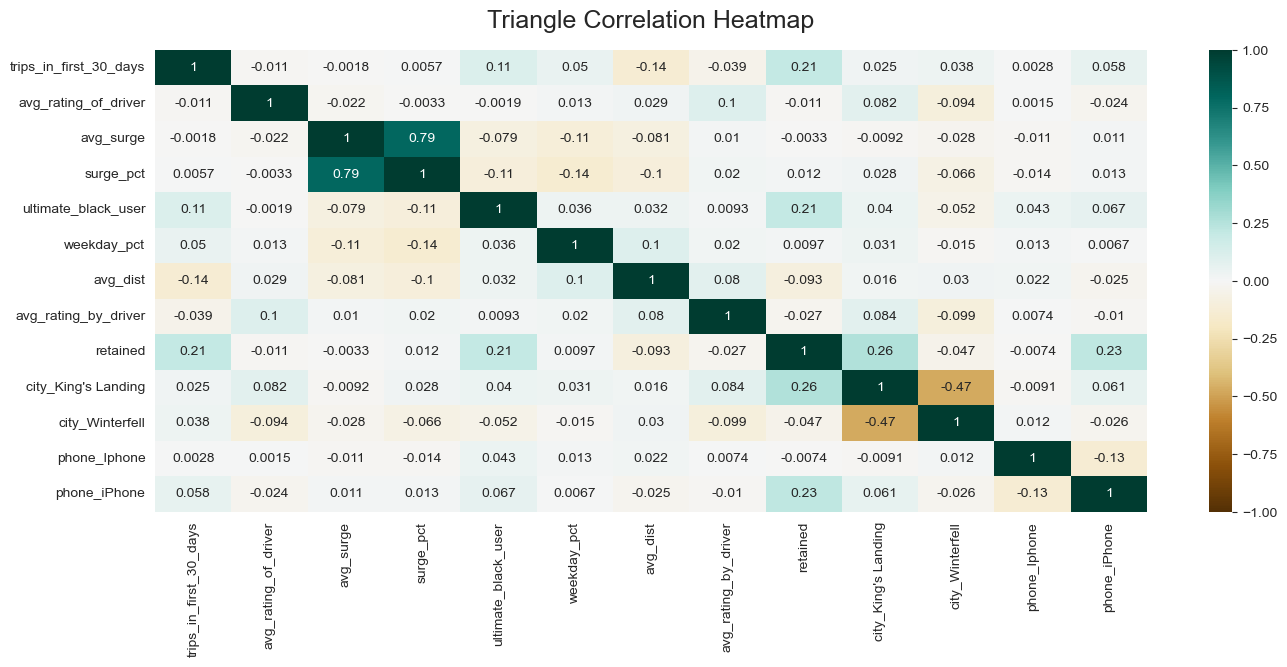

In [54]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
#mask = np.triu(np.ones_like(ultimate.corr(), dtype=np.bool))
heatmap = sns.heatmap(ultimate.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

ValueError: could not convert string to float: "King's Landing"

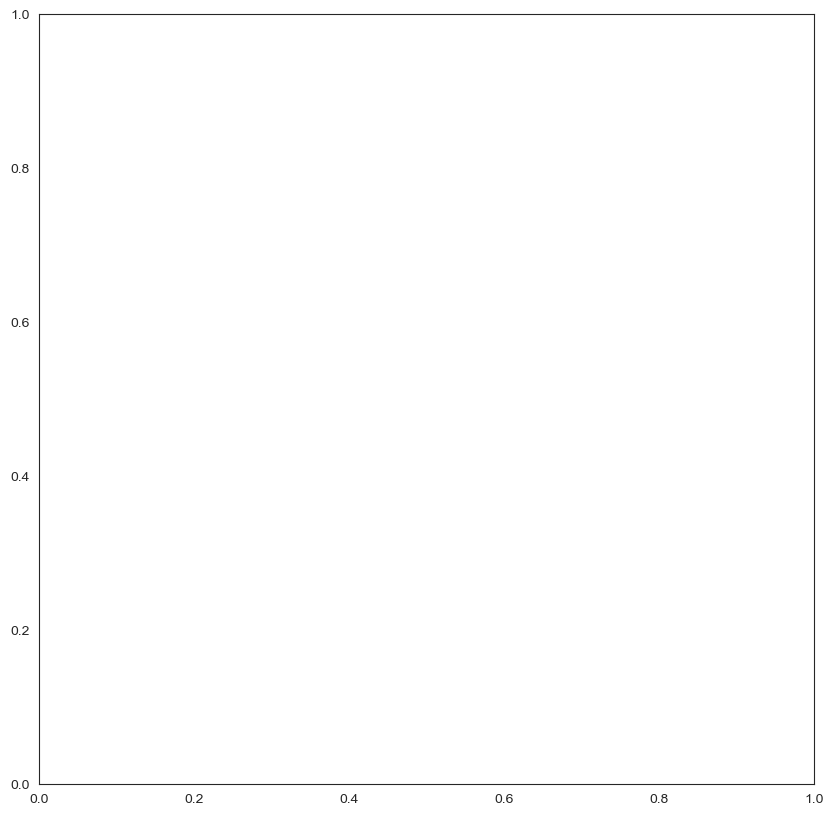

In [38]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(ultimate.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Model Building

  1. Logistic Regression (Linear)
  2. Support Vector Machine Classifier (SVM) (Non-linear)
  3. Random Forest Classifier (ensemble of tree-based)
  4. Gradient Boosting Classifier ((ensemble of tree-based)

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [40]:
# convert categorical features into dummy variables
ultimate = pd.get_dummies(ultimate, drop_first=True)

In [41]:
# check again for basic info of the dataframe
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_rating_of_driver    50000 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   surge_pct               50000 non-null  float64
 4   ultimate_black_user     50000 non-null  bool   
 5   weekday_pct             50000 non-null  float64
 6   avg_dist                50000 non-null  float64
 7   avg_rating_by_driver    50000 non-null  float64
 8   retained                50000 non-null  int64  
 9   city_King's Landing     50000 non-null  bool   
 10  city_Winterfell         50000 non-null  bool   
 11  phone_Iphone            50000 non-null  bool   
 12  phone_iPhone            50000 non-null  bool   
dtypes: bool(5), float64(6), int64(2)
memory usage: 3.3 MB


In [42]:
# extract the features X  and the target variable y
y = ultimate['retained']
X = ultimate.drop('retained', axis=1)

In [43]:
# Splitting the dataset in training (75%) and testing set (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42,
                                                    stratify=y)

In [44]:
# scale X_train numeric continuous features
scaler = StandardScaler()
numeric_cols = X_train.columns[(X_train.dtypes == 'float64') | (X_train.dtypes == 'int64')].to_list()
scaler.fit(X_train[numeric_cols])
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])

In [45]:
# I will list and compare the different algorithms. 
model_evaluation = []

def Evaluation(model, X_test, y_test, y_pred):
    """
    This function is to produce model statistics
    """
    # Append model statistics to model_evaluation list
    roc_auc = roc_auc_score(y_test, y_pred)
    Precision=precision_score(y_test,y_pred)
    Accuracy=accuracy_score(y_test,y_pred)
    Recall=recall_score(y_test,y_pred)
    F1=f1_score(y_test,y_pred)
    model_evaluation.append([model, Accuracy, roc_auc, Precision, Recall, F1])

In [46]:
# Create a dictionary for the models
models = {'LR': LogisticRegression(),
          'SVM': SVC(),
          'RF': RandomForestClassifier(),
          'GB': GradientBoostingClassifier()}

# flag variable
header = True

for i in models.keys():
    models[i].fit(X_train, y_train)
    scores = models[i].score(X_test, y_test)
    if header == True:
        print('model', '\t', 'accuracy_score')
        print('-----------------------')
        header = False
    
    print(i, '\t', scores)
    
    # Predict the labels
    y_pred = models[i].predict(X_test)
    Evaluation(i, X_test, y_test, y_pred)

model 	 accuracy_score
-----------------------
LR 	 0.67048
SVM 	 0.62392
RF 	 0.63256
GB 	 0.63528


In [47]:
# prepare a dataframe using all the models with their performance measures
df_eval=pd.DataFrame(model_evaluation,columns=['Model', 'Accuracy', 'ROC_AUC', 'Precision', 'Recall', 'F1'])
df_eval.sort_values(['ROC_AUC'],ascending=False,inplace=True)
df_eval=df_eval.set_index('Model')
df_eval

,Accuracy,ROC_AUC,Precision,Recall,F1
Model,,,,,
LR,0.67048,0.633472,0.57330,0.484152,0.524968
RF,0.63256,0.559905,0.52250,0.266752,0.353190
GB,0.63528,0.545945,0.54432,0.185492,0.276694
SVM,0.62392,0.500000,0.00000,0.000000,0.000000


__GradientBoostingClassifier__ algorithm has the highest accuracy score along with the highest ROC-AUC, precision, recall, and F1 scores. Overall, it gives the highest performance in predicting the rider retention. In the following section, I will perform a parameter-tuning for the GradientBoostingClassifier model.

In [48]:
# grid search optimization of GradientBoostingClassifier

# grid search of parameters n_estimators and max_features to improve GradientBoostingClassifer model
param_grid = {'n_estimators': np.arange(200,1000,200)}

# instantiate a Decision Tree classifier: tree
gb = GradientBoostingClassifier()

# instantiate the GridSearchCV object
gb_cv = GridSearchCV(gb, param_grid, scoring='accuracy', cv=3)

# fit it to the data
gb_cv.fit(X_train, y_train)

# print the tuned parameters and score
print("Tuned Gradient Boosting Classifier Parameters: {}".format(gb_cv.best_params_)) 
print("Best score is {}".format(gb_cv.best_score_))

Tuned Gradient Boosting Classifier Parameters: {'n_estimators': 600}
Best score is 0.7876266666666667


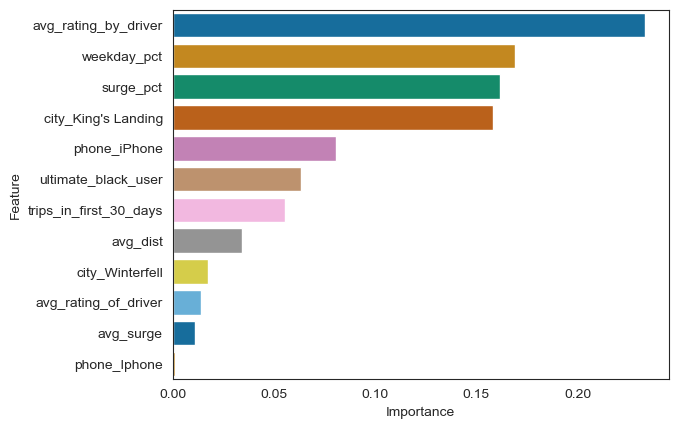

In [49]:
gb = GradientBoostingClassifier(n_estimators=600)
gb.fit(X_train, y_train)

# feature importance
feat = X_train.columns
imp = gb.feature_importances_
df_gb = pd.DataFrame({'Feature': feat, 'Importance': imp})
df_gb = df_gb.sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=df_gb, palette='colorblind');

### Business Recommendations

The drivers of King's Landing tend to have greater probability for retention compared to the other two cities. One recommendation can be increasing operations in King's Landing or alternatively looking for the possible reasons for the rider retention that is unique to the King's Landing.
Ultimate black users also tend to show a greater retention rate than the non-ultimate black users. Similarly, drivers who use iPhone have a higher probability to remain than the drivers who use Android phones. Additional investigation may be required to understand the reasons behind the differences between the groups.
As the Gradient Boosting Classifier suggests, avg_rating_by_driver, surge_pct and weekday_pct features are among the most important features in predicting rider retention. Hence, the Ultimate Inc. can focus on these important features as giving perks or additional benefits to those who drive in weekdays.